# Imbalanced-learn
## Eaxmples based on real world datasets

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

## make_imbalance function
http://glemaitre.github.io/imbalanced-learn/auto_examples/datasets/plot_make_imbalance.html#sphx-glr-auto-examples-datasets-plot-make-imbalance-py

Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Original set')

Text(0.5, 1.0, 'ratio = 90%')

Text(0.5, 1.0, 'ratio = 75%')

Text(0.5, 1.0, 'ratio = 50%')

Text(0.5, 1.0, 'ratio = 25%')

Text(0.5, 1.0, 'ratio = 10%')

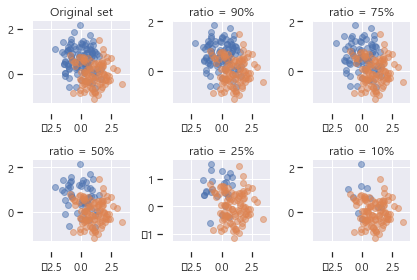

In [19]:
# Authors: Dayvid Oliveira
#          Christos Aridas
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

from imblearn.datasets import make_imbalance

print(__doc__)


def plot_decoration(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-4, 4])


# Generate the dataset
X, y = make_moons(n_samples=200, shuffle=True, noise=0.5, random_state=10)

# Two subplots, unpack the axes array immediately
f, axs = plt.subplots(2, 3)

axs = [a for ax in axs for a in ax]

axs[0].scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
axs[0].scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
axs[0].set_title('Original set')
plot_decoration(axs[0])

ratios = [90, 75, 50, 25, 10]

for i, ratio in enumerate(ratios, start=1):
    ax = axs[i]

    X_, y_ = make_imbalance(X, y, sampling_strategy={0: ratio}, min_c_=1)
    ax.scatter(X_[y_ == 0, 0], X_[y_ == 0, 1], label="Class #0", alpha=0.5)
    ax.scatter(X_[y_ == 1, 0], X_[y_ == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title('ratio = {}%'.format(ratio))
    plot_decoration(ax)

plt.tight_layout()
plt.show()

https://imbalanced-learn.org/stable/auto_examples/datasets/plot_make_imbalance.html#sphx-glr-auto-examples-datasets-plot-make-imbalance-py

## 9. Dataset loading utilities
### 9.1. Imbalanced datasets for benchmark
- fetch_datasets allows to fetch 27 datasets which are imbalanced and binarized. The following data sets are available:
- https://imbalanced-learn.org/stable/datasets/index.html#imbalanced-datasets-for-benchmark

In [21]:
from collections import Counter
from imblearn.datasets import fetch_datasets
ecoli = fetch_datasets()['ecoli']
ecoli.data.shape

print(sorted(Counter(ecoli.target).items()))

(336, 7)

[(-1, 301), (1, 35)]


### 9.2. Imbalanced generator
make_imbalance turns an original dataset into an imbalanced dataset. This behaviour is driven by the parameter sampling_strategy which behave similarly to other resampling algorithm. sampling_strategy can be given as a dictionary where the key corresponds to the class and the value is the number of samples in the class:

In [28]:
from sklearn.datasets import load_iris
from imblearn.datasets import make_imbalance
iris = load_iris()
iris.keys()
iris.target.shape

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

(150,)

In [23]:
sampling_strategy = {0: 20, 1: 30, 2: 40}
X_imb, y_imb = make_imbalance(iris.data, iris.target,
                              sampling_strategy=sampling_strategy)
sorted(Counter(y_imb).items())

[(0, 20), (1, 30), (2, 40)]

In [24]:
sampling_strategy = {0: 10}
X_imb, y_imb = make_imbalance(iris.data, iris.target,
                              sampling_strategy=sampling_strategy)
sorted(Counter(y_imb).items())

[(0, 10), (1, 50), (2, 50)]

In [29]:
def ratio_multiplier(y):
    multiplier = {0: 0.5, 1: 0.7, 2: 0.95}
    target_stats = Counter(y)
    for key, value in target_stats.items():
        target_stats[key] = int(value * multiplier[key])
        
    return target_stats

X_imb, y_imb = make_imbalance(iris.data, iris.target,
                              sampling_strategy=ratio_multiplier)
sorted(Counter(y_imb).items())

[(0, 25), (1, 35), (2, 47)]

In [36]:
multiplier = {0: 0.5, 1: 0.7, 2: 0.95}
target_stats = Counter(iris.target)
target_stats

Counter({0: 50, 1: 50, 2: 50})

In [37]:
for key, value in target_stats.items():
    key, value
    multiplier[key]

(0, 50)

0.5

(1, 50)

0.7

(2, 50)

0.95

In [40]:
from sklearn.datasets import fetch_openml
df, y = fetch_openml('iris', version=1, return_X_y=True, as_frame=True)
df
y

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [44]:
df_resampled, y_resampled = make_imbalance(
    df, y, sampling_strategy={'Iris-setosa': 10, 'Iris-versicolor': 20},
    random_state=42)
df_resampled['target'] = y
df_resampled
df_resampled['target'].value_counts(normalize=True)

,sepallength,sepalwidth,petallength,petalwidth,target
0,4.3,3.0,1.1,0.1,Iris-setosa
1,5.1,3.4,1.5,0.2,Iris-setosa
2,4.8,3.1,1.6,0.2,Iris-setosa
3,4.8,3.0,1.4,0.3,Iris-setosa
4,5.1,3.5,1.4,0.3,Iris-setosa
...,...,...,...,...,...
75,6.7,3.0,5.2,2.3,Iris-versicolor
76,6.3,2.5,5.0,1.9,Iris-versicolor
77,6.5,3.0,5.2,2.0,Iris-versicolor
78,6.2,3.4,5.4,2.3,Iris-versicolor


Iris-setosa        0.625
Iris-versicolor    0.375
Iris-virginica     0.000
Name: target, dtype: float64

In [45]:
df_resampled.target.unique()

['Iris-setosa', 'Iris-versicolor']
Categories (2, object): ['Iris-setosa', 'Iris-versicolor']

# END